# K-Nearest-Neighbor Example


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load the data
dataset = pd.read_csv('Classified Data',index_col=0)
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
# Standardising the dataset
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(dataset.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
#Scalling the features
scaled_features = scale.transform(dataset.drop('TARGET CLASS',axis=1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [5]:
#Taking only the independent features
dataset_features = pd.DataFrame(scaled_features,columns=dataset.columns[:-1])
dataset_features

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [6]:
#Train test split
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(dataset_features,dataset['TARGET CLASS'],test_size=0.3)

In [7]:
#Importing KNN classifier from sklearn lib
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [8]:
pred = classifier.predict(x_test)

In [9]:
#Checking the accuracy of model 
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[142  15]
 [ 11 132]]


In [10]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       157
           1       0.90      0.92      0.91       143

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



## Select a K Value

In [11]:
error_rate =[]
for i in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

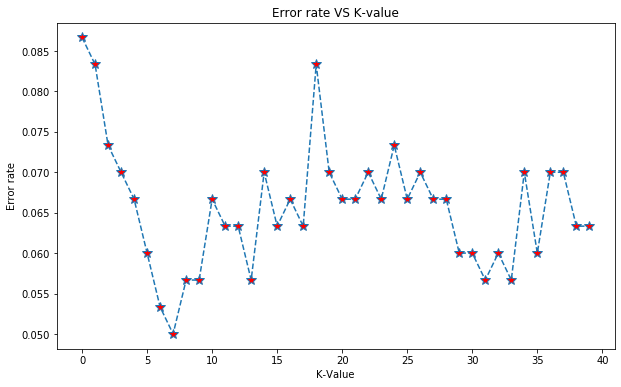

In [12]:
plt.figure(figsize=(10,6))
plt.plot(error_rate,ls='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.title('Error rate VS K-value')
plt.xlabel('K-Value')
plt.ylabel('Error rate')
plt.show()

In [13]:
#selecting K Value using accuracy rate
acc_score=[]

for i in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    acc=cross_val_score(knn,dataset_features,dataset['TARGET CLASS'],cv=10)
    acc_score.append(acc.mean())

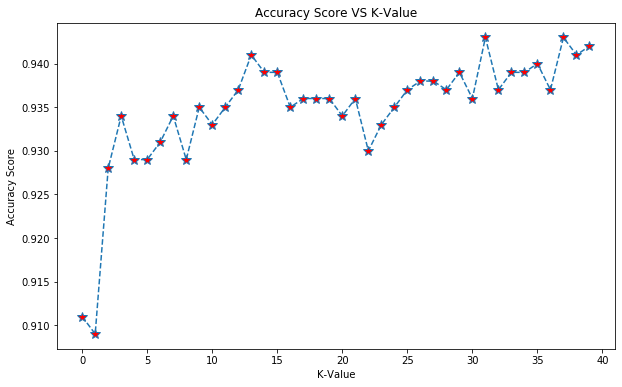

In [14]:
#Plotting graph for accuracy score
plt.figure(figsize=(10,6))
plt.plot(acc_score,ls='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.title('Accuracy Score VS K-Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy Score')
plt.show()

In [15]:
#Again training the model with K value - 23 according to the error rate in graph
classifier = KNeighborsClassifier(n_neighbors=23)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [16]:
pred = classifier.predict(x_test)
print(confusion_matrix(y_test,pred))

[[141  16]
 [  5 138]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       157
           1       0.90      0.97      0.93       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



### This shows the accuracy is increased by taking K value as 23 